In [9]:
import struct
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import tensorflow as tf
from tensorflow.keras import Sequential, Model
from tensorflow.keras.layers import Dense, MaxPooling2D, Conv2D, BatchNormalization, Dropout, Flatten

In [10]:
def read_idx(filename):
    with open(filename, 'rb') as f:
        zero, data_type, dims = struct.unpack('>HBB', f.read(4))
        shape = tuple(struct.unpack('>I', f.read(4))[0] for d in range(dims))
        return np.frombuffer(f.read(), dtype = np.uint8).reshape(shape)

In [25]:
x_train = read_idx(r"C:\Users\ASK Computers\Desktop\CV Projects\DeepLearningCV\fashion\train-images-idx3-ubyte")
y_train = read_idx(r"C:\Users\ASK Computers\Desktop\CV Projects\DeepLearningCV\fashion\train-labels-idx1-ubyte")
x_test = read_idx(r"C:\Users\ASK Computers\Desktop\CV Projects\DeepLearningCV\fashion\t10k-images-idx3-ubyte")
y_test = read_idx(r"C:\Users\ASK Computers\Desktop\CV Projects\DeepLearningCV\fashion\t10k-labels-idx1-ubyte")

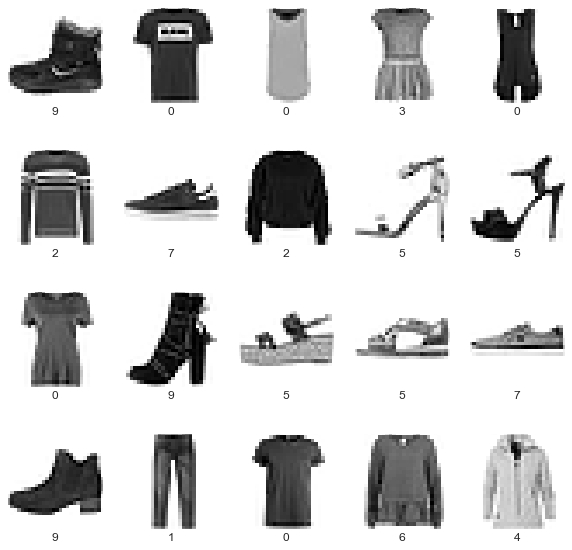

In [26]:
plt.figure(figsize = (10, 10))
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap = plt.cm.binary)
    plt.xlabel(y_train[i])
    
plt.show()

In [27]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [28]:
x_train = x_train/ 255.
x_test = x_test/ 255.

In [33]:
len(np.unique(y_train))

10

In [40]:
model = Sequential([
    
    Conv2D(32, (3, 3), activation = 'relu', input_shape = (28, 28, 1)),
    BatchNormalization(),
    Conv2D(32, (3, 3), activation = 'relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    
    Conv2D(64, (3, 3), activation = 'relu', input_shape = (28, 28, 1)),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation = 'relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.3),
    
    Flatten(),
    Dense(128, activation = 'relu'),
    Dense(128, activation = 'relu'),
    Dense(10, activation = 'softmax')
    
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_4 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
batch_normalization_5 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 10, 10, 64)       

In [41]:
epochs = 10
batch_size = 100

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])


In [42]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint('Checkpoints/fashion_mnist.h5',
                             monitor = 'val_loss',
                             mode = 'min',
                             save_best_only = True
                            )
earlystop = EarlyStopping(monitor = 'val_loss',
                          patience = 3,
                          min_delta = 0,
                          restore_best_weights = True
                         )
reduce_lr = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.4,
                              patience = 3,
                              min_delta = 0.0001
                             )

callbacks = [checkpoint, earlystop, reduce_lr]

In [43]:
history = model.fit(x_train, y_train, epochs = epochs, validation_data = (x_test, y_test), batch_size = batch_size, callbacks = callbacks)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 236s 4ms/sample - loss: 0.4559 - accuracy: 0.8324 - val_loss: 0.6016 - val_accuracy: 0.7992
Epoch 2/10
60000/60000 [==============================] - 235s 4ms/sample - loss: 0.2951 - accuracy: 0.8910 - val_loss: 0.2912 - val_accuracy: 0.8879
Epoch 3/10
60000/60000 [==============================] - 234s 4ms/sample - loss: 0.2570 - accuracy: 0.9044 - val_loss: 0.2473 - val_accuracy: 0.9081
Epoch 4/10
60000/60000 [==============================] - 233s 4ms/sample - loss: 0.2317 - accuracy: 0.9143 - val_loss: 0.2509 - val_accuracy: 0.9084
Epoch 5/10
60000/60000 [==============================] - 233s 4ms/sample - loss: 0.2170 - accuracy: 0.9194 - val_loss: 0.2966 - val_accuracy: 0.8938
Epoch 6/10
60000/60000 [==============================] - 237s 4ms/sample - loss: 0.2000 - accuracy: 0.9251 - val_loss: 0.2171 - val_accuracy: 0.9213
Epoch 7/10
60000/60000 [==========================

In [44]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 6s 608us/sample - loss: 0.2171 - accuracy: 0.9213


[0.21707166720628737, 0.9213]

In [51]:
import cv2
import numpy as np

def getLabel(input_class):
    number = int(input_class)
    if number == 0:
        return "T-shirt/top "
    if number == 1:
        return "Trouser"
    if number == 2:
        return "Pullover"
    if number == 3:
        return "Dress"
    if number == 4:
        return "Coat"
    if number == 5:
        return "Sandal"
    if number == 6:
        return "Shirt"
    if number == 7:
        return "Sneaker"
    if number == 8:
        return "Bag"
    if number == 9:
        return "Ankle boot"

def draw_test(name, pred, actual, input_im):
    BLACK = [0,0,0]

    res = getLabel(pred)
    actual = getLabel(actual)   
    expanded_image = cv2.copyMakeBorder(input_im, 0, 0, 0, 4*imageL.shape[0] ,cv2.BORDER_CONSTANT,value=BLACK)
    expanded_image = cv2.cvtColor(expanded_image.astype('float32'), cv2.COLOR_GRAY2BGR)
    cv2.putText(expanded_image, "Predicted - " + str(res), (152, 70) , cv2.FONT_HERSHEY_COMPLEX_SMALL,1, (0,255,0), 1)
    cv2.putText(expanded_image, "   Actual - " + str(actual), (152, 90) , cv2.FONT_HERSHEY_COMPLEX_SMALL,1, (0,0,255), 1)
    cv2.imshow(name, expanded_image)


for i in range(0,10):
    rand = np.random.randint(0,len(x_test))
    input_im = x_test[rand]
    actual = y_test[rand]
    imageL = cv2.resize(input_im, None, fx=4, fy=4, interpolation = cv2.INTER_CUBIC)
    input_im = input_im.reshape(1,28,28,1) 
    
    ## Get Prediction
    res = str(model.predict_classes(input_im, 1, verbose = 0)[0])

    draw_test("Prediction", res, actual, imageL) 
    cv2.waitKey(0)

cv2.destroyAllWindows()